# Predicting Dengue Cases in Kerala using Support Vector Regressor

In [62]:
#Importing the necessary packages
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import mean_absolute_error

# Reading The datafile containing the dengue case count along with along other weather features

In [63]:
pwd = os.getcwd()
filepath = os.path.join(pwd,r"DATA/try_data.csv")
filepath

'/Users/nalinrajendran/Desktop/STUDY/MIS  SIP PAPER/OUR CODE/COMMENTED/DATA/try_data.csv'

In [64]:
df = pd.read_csv(filepath)
df
# In the months columns we have assigned numbers from 1 to 12 respectively for the months from January To December 
#The table includes precipitation,humidity,temperature parameters

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2011,1,68,23.47,72.81,0.04,0.00,13.18,32.30,16.42,24.360,17.61
1,Kerala,2011,2,41,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65
2,Kerala,2011,3,54,27.33,61.00,0.44,10.55,13.37,36.56,18.12,27.340,17.42
3,Kerala,2011,4,53,27.20,72.94,4.01,105.47,16.42,36.91,22.50,29.705,21.04
4,Kerala,2011,5,84,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kerala,2021,8,327,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
128,Kerala,2021,9,194,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
129,Kerala,2021,10,215,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90
130,Kerala,2021,11,192,24.08,90.06,10.07,302.14,17.52,28.38,20.90,24.640,22.27


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         132 non-null    object 
 1   year          132 non-null    int64  
 2   month         132 non-null    int64  
 3   cases         132 non-null    int64  
 4   mean_temp     132 non-null    float64
 5   relative_hum  132 non-null    float64
 6   prec          132 non-null    float64
 7   prec_sum      132 non-null    float64
 8   humi_spe      132 non-null    float64
 9   temp_max      132 non-null    float64
 10  temp_min      132 non-null    float64
 11  temp_avg      132 non-null    float64
 12  dew_point     132 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 13.5+ KB


In [66]:
df.describe()

,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2016.000000,6.500000,483.984848,25.412121,78.569167,5.213333,154.496136,16.093864,32.165909,20.096591,26.131250,20.631667
std,3.174324,3.465203,785.498033,1.631589,12.025662,4.915950,151.150037,2.167127,3.613296,2.139324,2.158619,2.474223
min,2011.000000,1.000000,41.000000,23.300000,52.000000,0.000000,0.000000,10.800000,26.720000,14.700000,22.620000,13.730000
25%,2013.000000,3.750000,129.750000,24.205000,66.892500,1.030000,26.370000,14.437500,29.120000,18.202500,24.625000,18.960000
50%,2016.000000,6.500000,258.000000,24.700000,82.625000,3.950000,113.380000,17.030000,30.605000,20.640000,25.350000,21.800000
75%,2019.000000,9.250000,481.750000,26.505000,89.297500,8.315000,250.390000,17.820000,35.555000,21.557500,27.592500,22.532500
max,2021.000000,12.000000,5555.000000,29.550000,92.500000,21.370000,638.090000,18.800000,39.170000,24.310000,31.430000,23.400000


In [67]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].sum().plot.bar()

<AxesSubplot:xlabel='year'>

# The above bar graph indicates the yearwise count of dengue cases from 2011 to 2021

In [68]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].plot()
plt.title('Dengue Cases by Year ', fontsize = 25)

Text(0.5, 1.0, 'Dengue Cases by Year ')

In [69]:
plt.figure(figsize = (14,6))
df.groupby('year')['prec'].plot()
plt.title('Rainfall by Year ', fontsize = 25)

Text(0.5, 1.0, 'Rainfall by Year ')

# The above graph reflects the rainfall pattern over the period 2011-2021

# Declaring the input correlating features and output lables.

In [70]:
X = df.drop("cases", axis=1)
X = df.drop("state", axis=1)
#output feature we are selecting here is the case count
y = df["cases"]

# Splitting the data for Train and Test

In [71]:
#Taking the train and test data. We are using 80 percent of the data for training and 20 percent for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [72]:
X_train.drop("cases", axis=1).reset_index(drop=True)
X_test.drop("cases", axis=1).head().reset_index(drop=True)

,year,month,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,2012,10,24.58,85.62,6.21,189.84,17.03,30.02,20.62,25.320,21.83
1,2013,6,24.37,90.50,21.37,638.09,17.88,28.71,21.65,25.180,22.60
2,2020,8,24.34,91.50,12.56,390.23,18.07,28.91,21.86,25.385,22.78
3,2021,7,24.32,91.25,12.29,380.94,18.01,28.20,22.05,25.125,22.71
4,2011,2,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65


In [73]:
y_train

119     86
0       68
113    709
37      72
14     131
      ... 
34     145
58     293
63     222
88     441
85      95
Name: cases, Length: 92, dtype: int64

In [74]:
#Here, we have used the Linear kerel and with little hyper parameter tuning.
model = SVR(kernel='linear',C=100,gamma=.009)


#Making the model fit on the features and lables.
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Test accuracy: {:.2f}".format(accuracy))


Test accuracy: 1.00


# Prediction and Comparision of the predicted values and actual values


In [75]:
y_pred = model.predict(X_test)

df1 = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

df1


,Actual,Predicted
21,414,414.085868
29,2161,2161.018655
115,153,153.097197
126,938,938.066148
1,41,41.099808
70,341,341.084721
50,99,99.096355
66,1264,1264.053915
111,76,76.096601
7,146,146.099018


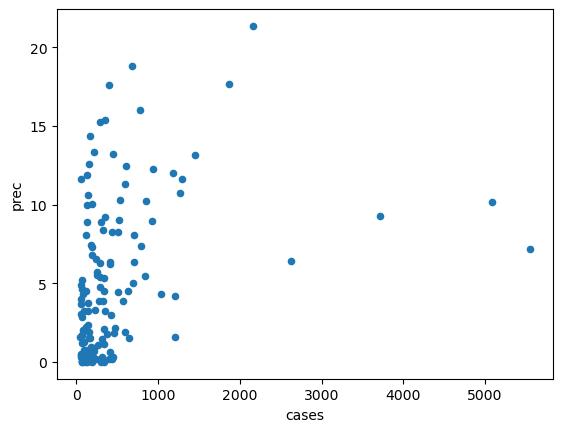

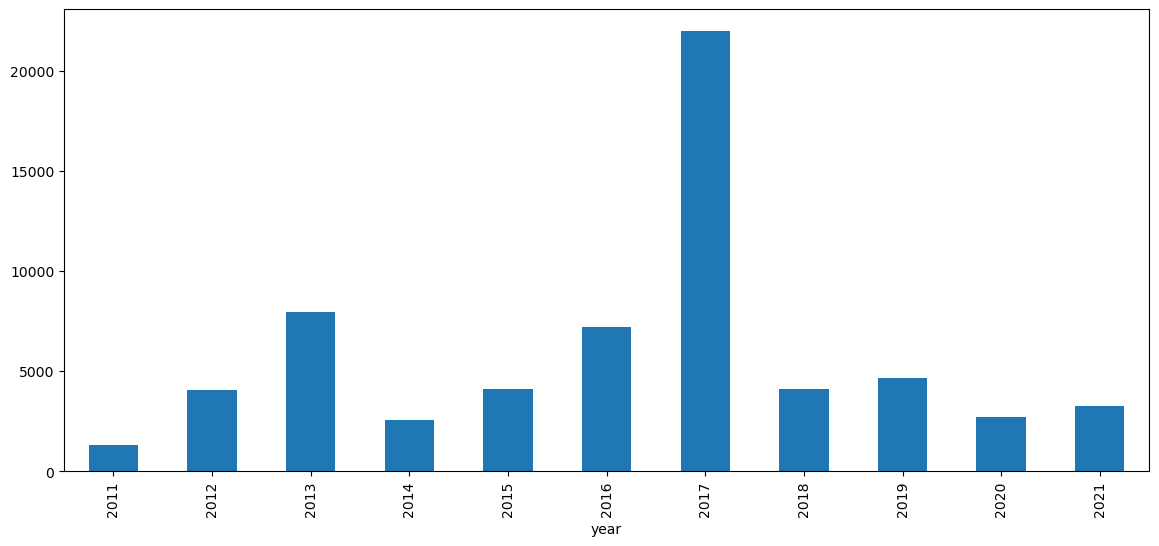

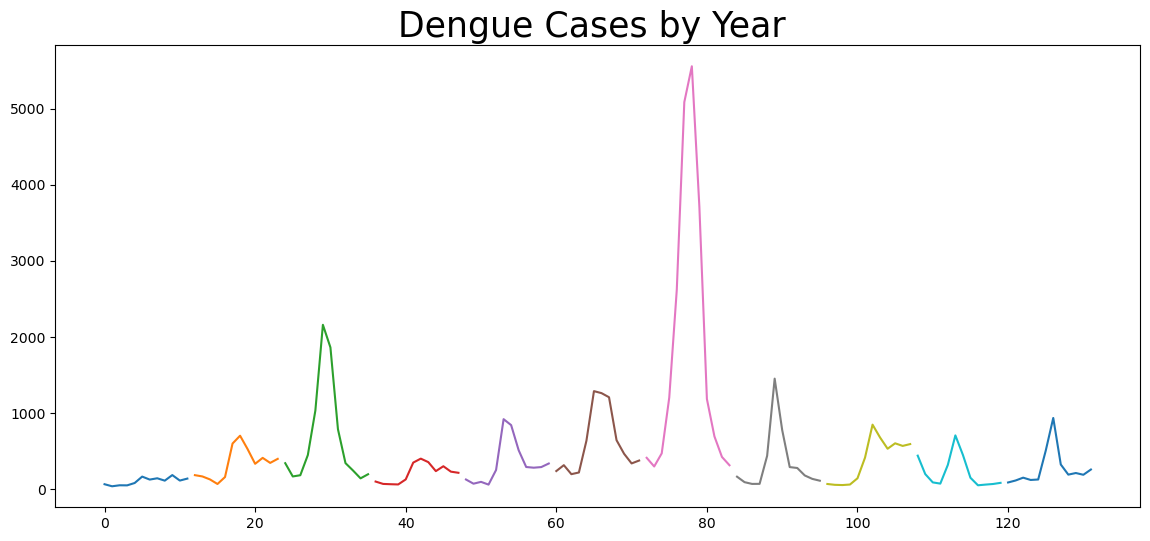

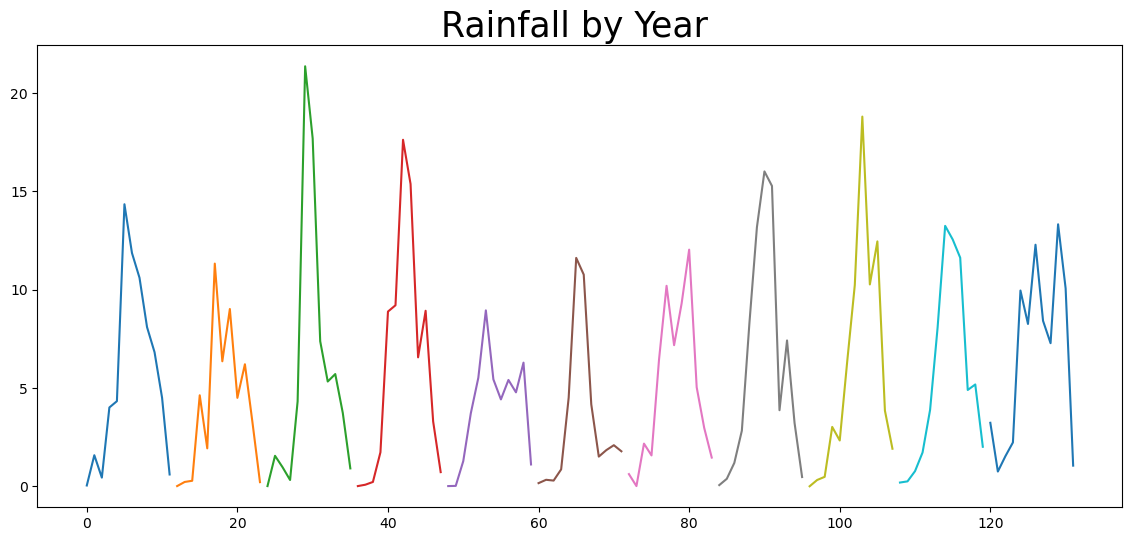

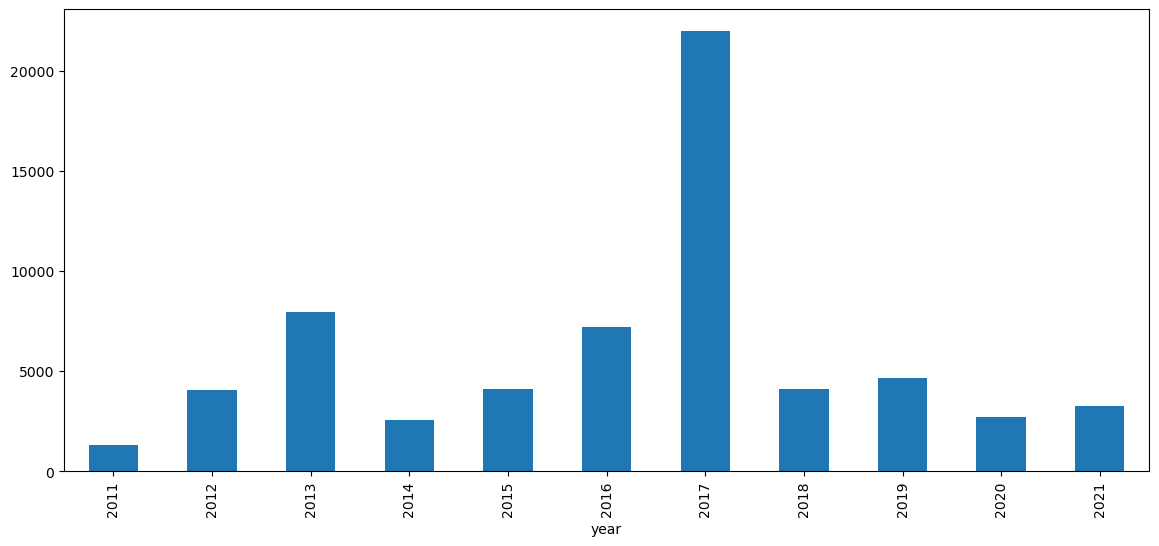

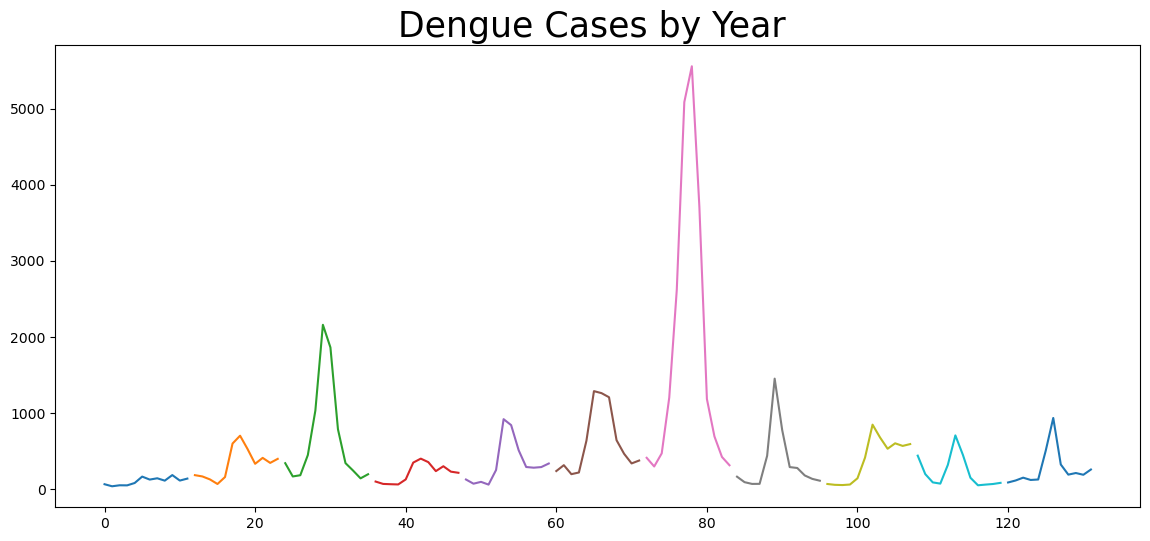

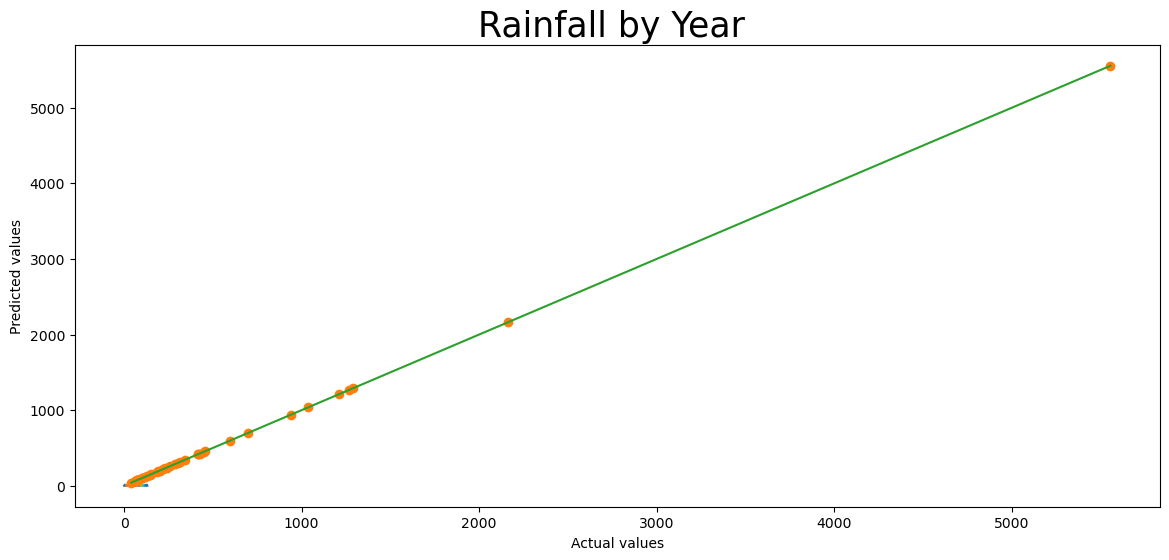

In [76]:
# Plot the actual versus predicted values
plt.plot(y_test, y_pred, "o")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [77]:
df.plot(x="cases", y="prec", kind="scatter")

<AxesSubplot:xlabel='cases', ylabel='prec'>

# Evaluation metric- Mean Absolute Error

In [78]:
#MAE of the model.

mean_absolute_error(y_test, y_pred)

0.08642944054985477